# 04_preprocessing

Description: Readying data for for modeling

## Table of Contents

1. [One-Hot Encode Genres](#1)
2. [One-Hot Encode Additional Features](#2)
3. [SVD on Genres](#3)
4. [Merging Into Final Dataset](#4)

In [1]:
import pickle
import re
import warnings

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.preprocessing import StandardScaler

%matplotlib inline

warnings.filterwarnings("ignore")

<a name="1"></a>
## 1. One-Hot Encode Genres

In [2]:
main_wfeats = pd.read_csv('../data/main_wfeats.csv', index_col='song_id')
gs = pd.read_csv('../data/gsong_lookup.csv', index_col='gs_id')

In [3]:
gsg = gs[['song_id', 'genre_name']].set_index('song_id')

In [4]:
genre_dummies = pd.get_dummies(gsg).groupby(['song_id']).sum()

In [5]:
genre_dummies.shape

(21033, 561)

In [6]:
genre_dummies.head()

,genre_name_a cappella,genre_name_acid house,genre_name_acid jazz,genre_name_acoustic blues,genre_name_acoustic pop,genre_name_acoustic punk,genre_name_adult standards,genre_name_african rock,genre_name_album rock,genre_name_albuquerque indie,...,genre_name_vogue,genre_name_west coast rap,genre_name_west coast trap,genre_name_western swing,genre_name_world,genre_name_world worship,genre_name_worship,genre_name_wrestling,genre_name_yugoslav rock,genre_name_zolo
song_id,,,,,,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
001wUOgo8t9VElHl45bxzr,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003eoIwxETJujVWmNFMoZy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
003z5LtGJ2cdJARKIO9LgL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
004S8bMhFQjnbuqvdh6W71,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Missing a Number of Songs With No Genre

In [7]:
main_wfeats.shape

(22891, 81)

In [8]:
for sid in main_wfeats.index:
    if sid not in genre_dummies.index:
        genre_dummies.loc[sid] = 0

##### Checking for null values

In [10]:
genre_dummies[genre_dummies.isnull().any(1)]

,genre_name_a cappella,genre_name_acid house,genre_name_acid jazz,genre_name_acoustic blues,genre_name_acoustic pop,genre_name_acoustic punk,genre_name_adult standards,genre_name_african rock,genre_name_album rock,genre_name_albuquerque indie,...,genre_name_vogue,genre_name_west coast rap,genre_name_west coast trap,genre_name_western swing,genre_name_world,genre_name_world worship,genre_name_worship,genre_name_wrestling,genre_name_yugoslav rock,genre_name_zolo
song_id,,,,,,,,,,,,,,,,,,,,,


In [11]:
genre_dummies.rename(columns = lambda x: x.replace('genre_name_', 'genre_'), inplace=True)

In [12]:
genre_dummies.to_csv('../data/genre_dummies.csv')

In [13]:
genre_dummies = pd.read_csv('../data/genre_dummies.csv', index_col='song_id')

<a name="2"></a>
## 2. One-Hot Encoding Additional Features

I've also one-hot encoded the key and time signature features, since despite their numerical represenation, there is not an actual ordinal relationship between them.

In [9]:
main_wfeats.drop('Unnamed: 0', axis=1, inplace=True)

In [14]:
tk_dummies = pd.get_dummies(main_wfeats[['key', 'time_signature']])

In [15]:
main_wfeats = main_wfeats.drop(['key', 'time_signature'], 1).merge(tk_dummies, left_on='song_id', right_on='song_id')

In [16]:
main_wfeats.shape

(22891, 80)

##### Sanity Check for null values

In [17]:
main_wfeats[main_wfeats.isnull().any(1)]

,album_release_date,artist_id,artist_name,duration_ms,explicit,linked_album,song_title,danceability,energy,loudness,...,pv_dim_5,pv_dim_6,pv_dim_7,pv_dim_8,pv_dim_9,pv_dim_10,pv_dim_11,pv_dim_12,key,time_signature
song_id,,,,,,,,,,,,,,,,,,,,,


<a name="3"></a>
## 3. SVD on Genres

When I initially ran through preprocessing, and created the cosine similarity matrix to power the recommender, I had run all of my features through SVD. However, since genres make up such a large portion of my featureset, and since the genre's are directly tied to artists and not to individual songs, the song recommendations computed through the original SVD matrix often featured the same artist as the one who performed the song given. Even if we account for the performing artist, and only recommend songs that *aren't* from the artist, the resulting recommendations were quite homogenous with regard to the performing artists shown. 

This sort of functionality is a departure from what I expected from a recommender within my problem statement. So, in order to account for this level of homogeneity, and recommend more song titles that don't come from the same 2-3 artists, I performed SVD on just the genres. The thought was, if I can truncate the number of features reserved for genres significantly, the cosine similarity between titles will be more influenced by the actual audio features, and give the recommender a better chance of recommending songs from a diverse assortement of artists.

In [18]:
len(genre_dummies.columns)

561

##### Creating Truncated SVD with 50 Genre Components

In [19]:
SVDg = TruncatedSVD(50)
svd_g = SVDg.fit_transform(genre_dummies)

### 3a. Looking at the Explained Variance Ratio

The expalained variance within the first 50 components seemed enough to proceed with merging the matrix back into my dataset. If there was any less, I don't think it would capture enough variance, and therefore I'd have rerun the SVD with a larger number of components.

Text(0, 0.5, 'variance ratio')

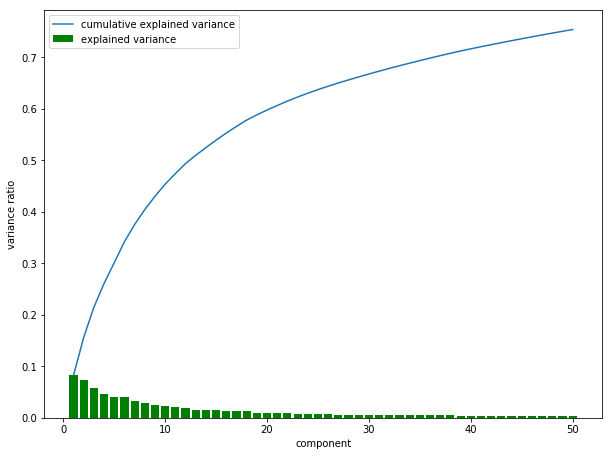

In [20]:
fig = plt.figure(figsize=(10,7.5))
plt.bar(np.array(range(50))+1, 
        SVDg.explained_variance_ratio_, 
        color='g', 
        label='explained variance')
plt.plot(np.array(range(50))+1, 
         np.cumsum(SVDg.explained_variance_ratio_), 
         label='cumulative explained variance')
plt.legend()
plt.xlabel('component')
plt.ylabel('variance ratio')

In [21]:
component_names = ["component_"+str(i+1) for i in range(50)]
svd_dfg = pd.DataFrame(svd_g,
                      columns=component_names)
svd_dfg.insert(0, 'song_id', genre_dummies.index)
svd_dfg.set_index('song_id', inplace=True)
svd_dfg.head()

,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_41,component_42,component_43,component_44,component_45,component_46,component_47,component_48,component_49,component_50
song_id,,,,,,,,,,,,,,,,,,,,,
000xQL6tZNLJzIrtIgxqSl,0.034297,0.518050,0.053728,0.244051,0.257620,-0.868581,-0.223638,0.074583,-0.680163,0.821611,...,-0.003460,0.011928,0.100614,-0.058651,-0.057414,0.012382,-0.012484,0.076459,0.003742,-0.014773
001wUOgo8t9VElHl45bxzr,0.122199,2.031721,0.938149,-0.035596,-0.062278,0.161441,0.356476,-0.039815,0.528458,-0.632784,...,-0.254008,0.380145,0.189807,0.330447,-0.120332,0.291652,-0.055658,-0.098148,0.001609,-0.171176
003eoIwxETJujVWmNFMoZy,0.049012,0.806849,0.210583,0.303004,0.323588,-1.145104,-0.147442,0.107252,-0.507237,0.723829,...,0.072019,-0.115762,0.130353,-0.189727,-0.129315,0.162972,-0.053747,0.073247,0.129393,0.020672
003z5LtGJ2cdJARKIO9LgL,0.754805,-0.008302,-0.122599,1.967584,0.204409,0.516366,-0.155120,0.224099,0.014917,-0.157300,...,0.039199,0.284415,0.167499,-0.097665,0.041186,0.048867,0.026802,-0.055070,0.091819,0.004027
004S8bMhFQjnbuqvdh6W71,0.422349,0.008751,0.069751,-0.120770,-0.047878,-0.066245,-0.632707,-0.322240,0.336451,0.206024,...,-0.081060,-0.014322,-0.173423,0.253491,-0.182127,0.250500,0.190280,0.087184,-0.021932,-0.171919


### 3b. Comparing the Weights of Each Component with a Feature Loadings Matrix



In [22]:
loadings_g = pd.DataFrame(SVDg.components_,
                        index=component_names,
                        columns=genre_dummies.columns).T

In [23]:
for col in loadings_g.columns:
    loadings_g[f'abs_{col}'] = np.abs(loadings_g[col])

In [24]:
loadings_g.shape

(561, 100)

In [25]:
def get_top_loadings(comp_num):
    return loadings_g.sort_values(f'abs_component_{comp_num}',ascending=False).head(10)[[f'component_{comp_num}']]

In [26]:
get_top_loadings(1)

,component_1
genre_rock,0.465959
genre_mellow gold,0.352421
genre_album rock,0.351506
genre_classic rock,0.314779
genre_soft rock,0.313958
genre_folk rock,0.266588
genre_hard rock,0.203417
genre_southern rock,0.167607
genre_art rock,0.157661
genre_blues-rock,0.149565


I decided to grab the heighest weighted features of the first 6 components, to plot those genres against other song features, to get an idea of how the most similar song titles are clustered (in `i_feat_relationships`).

#### Dropping Columns Before Conducting Cosine Similarity

I got rid of `album_release_date`,`duration_ms`, `artist_id`, `artist_name`, `linked_album`, and `song_title` before finalizing my dataset. None are related to the song itself.

In [27]:
main_wfeats.drop(['artist_id', 'artist_name', 'album_release_date',
                  'duration_ms', 'linked_album', 'song_title'], 1, inplace=True)

In [28]:
main_wfeats['explicit'] = main_wfeats['explicit'].astype('float64', copy=False)

In [29]:
main_wfeats.shape

(22891, 74)

In [33]:
main_wfeats.columns

Index(['explicit', 'danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'key_changes', 'mean_song_conf', 'mean_loudness', 'mean_mode',
       'mean_mode_conf', 'mean_tempo', 'mean_tempo_conf', 'var_song_conf',
       'var_loudness', 'var_mode', 'var_mode_conf', 'var_tempo',
       'var_tempo_conf', 'tm_dim_1', 'tm_dim_2', 'tm_dim_3', 'tm_dim_4',
       'tm_dim_5', 'tm_dim_6', 'tm_dim_7', 'tm_dim_8', 'tm_dim_9', 'tm_dim_10',
       'tm_dim_11', 'tm_dim_12', 'tv_dim_1', 'tv_dim_2', 'tv_dim_3',
       'tv_dim_4', 'tv_dim_5', 'tv_dim_6', 'tv_dim_7', 'tv_dim_8', 'tv_dim_9',
       'tv_dim_10', 'tv_dim_11', 'tv_dim_12', 'pm_dim_1', 'pm_dim_2',
       'pm_dim_3', 'pm_dim_4', 'pm_dim_5', 'pm_dim_6', 'pm_dim_7', 'pm_dim_8',
       'pm_dim_9', 'pm_dim_10', 'pm_dim_11', 'pm_dim_12', 'pv_dim_1',
       'pv_dim_2', 'pv_dim_3', 'pv_dim_4', 'pv_dim_5', 'pv_dim_6', 'pv_dim_7',
       'pv_dim_8', 'pv_dim_9', 'pv_d

#### Adding in Genres for Cosine Similarity Ready Dataframe

In [30]:
scale_songs = StandardScaler()
main_songs_svd = main_wfeats.merge(svd_dfg, left_on='song_id', right_on='song_id')
main_songs_scaled_svd = scale_songs.fit_transform(main_songs_svd)

##### Pickling Song Listing for Calculating Cosine Similarity

In [31]:
with open('../pickle/main_songs_scaled_svd.pkl', 'wb') as f:
    pickle.dump(main_songs_scaled_svd, f)

In [32]:
main_songs_svd.to_csv('../data/main_songs_svdg.csv')

#### Next notebook: 05_cosine